# Ensemble Learning and Random Forest
## Ensemble Learning
The core concept of ensemble learning is that instead of developing a single model to forecast the target or the future, we could consider using multiple models to predict the target. Although there appear to be an infinite amount of ensembles that we may create for our predictive modeling problem, three strategies dominate the area of ensemble learning. Bagging, stacking, and boosting are the three primary types of ensemble learning methods.

![](https://i2.wp.com/dataaspirant.com/wp-content/uploads/2020/09/2-Ensemble-Learning.png?w=1380&ssl=1)
* **Bagging** involves fitting many decision trees on different samples of the same dataset and averaging the predictions.
* **Stacking** involves fitting many different models types on the same data and using another model to learn how to best combine the predictions.
* **Boosting** involves adding ensemble members sequentially that correct the predictions made by prior models and outputs a weighted average of the predictions.


## Bagging
The bagging approach involves building all of the distinct models in concurrently, each of which is unique. In this method, all of the observations in the bootstrapping sample are considered equally. In other words, all the observations will have equal at zero weightage. As a result, it is also known as bootstrap aggregation.

![](https://i2.wp.com/dataaspirant.com/wp-content/uploads/2020/09/5-Bagging-ensemble-method.png?w=1380&ssl=1)

* As a first step, we will divide the dataset into N samples using the bootstrapping approach. Then we'll decide the algorithm to try. 

* Assume we choose a decision tree, and each bootstrap sample is utilized to generate one random forest model. Don't forget that all of the decision trees are constructed in simultaneously. 

* Once the training step is complete, we will transmit the observations to all N decision trees in order to forecast the goal outcome. Each decision tree will forecast a single result. The final prediction goal will be determined by majority of votes.

Bagging methods are applicable to both classification and regression issues. We employ the majority voting methodology for the final prediction when utilizing the bagging method of classification. In contrast, while dealing with regression issues, we take the average of all the results predicted by separate models.

#### Pros & Cons
Overfitting can be reduced by bagging. Because we're utilizing the majority vote method to average all of the model results. However, for regression models, the predicted value will not be optimal if any of the models deviates more than the others, because the output value will be the average of all the models.


## Random Forest Algorithm
The random forest algorithm is a supervised classification algorithm. This algorithm, as the name implies, creates the forest with plentiful trees. In general, the more trees there are in a forest, the more robust it appears. Similarly, with the random forest classifier, the larger the number of trees in the forest, the better the accuracy outcomes.

![](https://i0.wp.com/dataaspirant.com/wp-content/uploads/2017/04/Random-Forest-Introduction.jpg?w=800&ssl=1)
#### Steps
* In Random forest n number of random records are taken from the data set having k number of records.

* Individual decision trees are constructed for each sample.

* Each decision tree will generate an output.

* Final output is considered based on Majority Voting or Averaging for Classification and regression respectively.


## Decision trees vs. Random Forest
| Decision trees | Random Forest    | 
|:-------------|:-----------|
| 1. Decision trees normally suffer from the problem of overfitting if it’s allowed to grow without any control. | 1. Random forests are created from subsets of data and the final output is based on average or majority ranking and hence the problem of overfitting is taken care of.       | 
| 2. A single decision tree is faster in computation. | 2. It is comparatively slower.   |
| 3. When a data set with features is taken as input by a decision tree it will formulate some set of rules to do prediction.| 3. Random forest randomly selects observations, builds a decision tree and the average result is taken. It doesn’t use any set of formulas.       | 


## Data
There are 270 observations and 5 variables in the heart disease data. The binary categorize response variable "heart disease" specifies whether or not an individual has heart disease. Other risk factors for heart disease include:
* Age
* Sex
* Blood Pressure
* Cholestrol

## Package 
I will use the following packages in this project:
* [matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
* [numpy](https://numpy.org)
* [pandas](https://pandas.pydata.org)
* [seaborn](https://seaborn.pydata.org)
* [sklearn](https://scikit-learn.org/stable/)

In [23]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [25]:
# Reading the csv file 
heart = pd.read_csv('heart_v2.csv')
heart.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


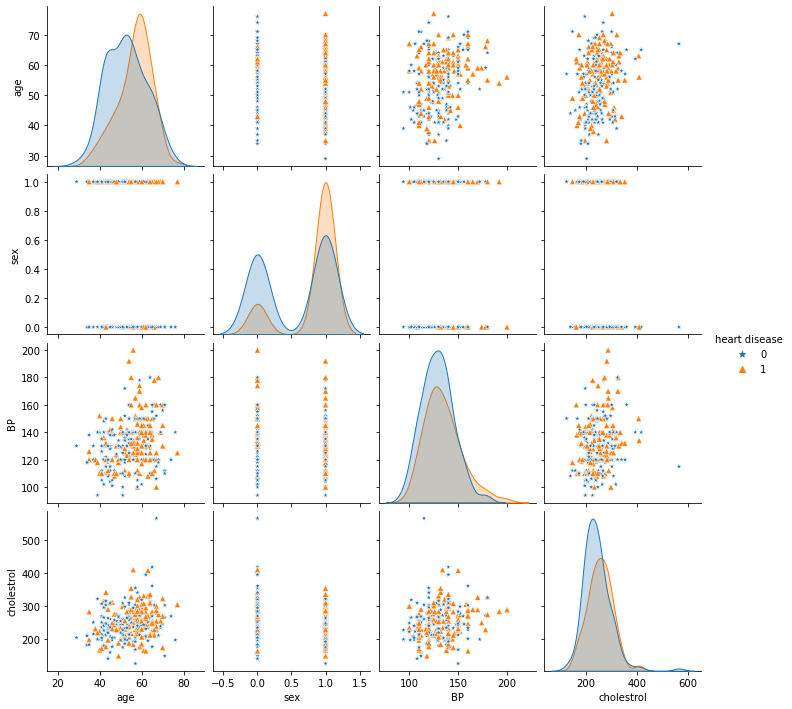

In [26]:
sns.pairplot(heart, hue="heart disease", markers=["*", "^"])

In [27]:
# Putting feature variable to X
X = heart.drop('heart disease',axis=1)
# Putting response variable to y
y = heart['heart disease']

I will use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) in sklearn.model_selection to split the dataset into the training set and test set.

In [28]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

## Random Forest

Import [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and fit the data.

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 0)
clf.fit(X_train,y_train)
clf.score(X_test, y_test)

0.6419753086419753

The mean accuracy on the given test data and labels is 0.64, which is not really high. Let's tune the hyperparameters to improve the performance.

Hyperparameter tuning for Random Forest using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and fit the data. 

In [30]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [31]:
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=clf,
                           param_grid=params,
                           cv = 4,
                           verbose=1, scoring="accuracy")

In [32]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [33]:
clf_best = grid_search.best_estimator_
clf_best

RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=200,
                       random_state=0)

In [65]:
grid_search.best_score_

0.6827349290780141

From hyperparameter tuning, the best set of parameters identified were max_depth=3, min_samples_leaf=10, n_estimators=200. And the accuracy score goes up to 0.6827.

I will use [tree.plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) to visualize the tree. 

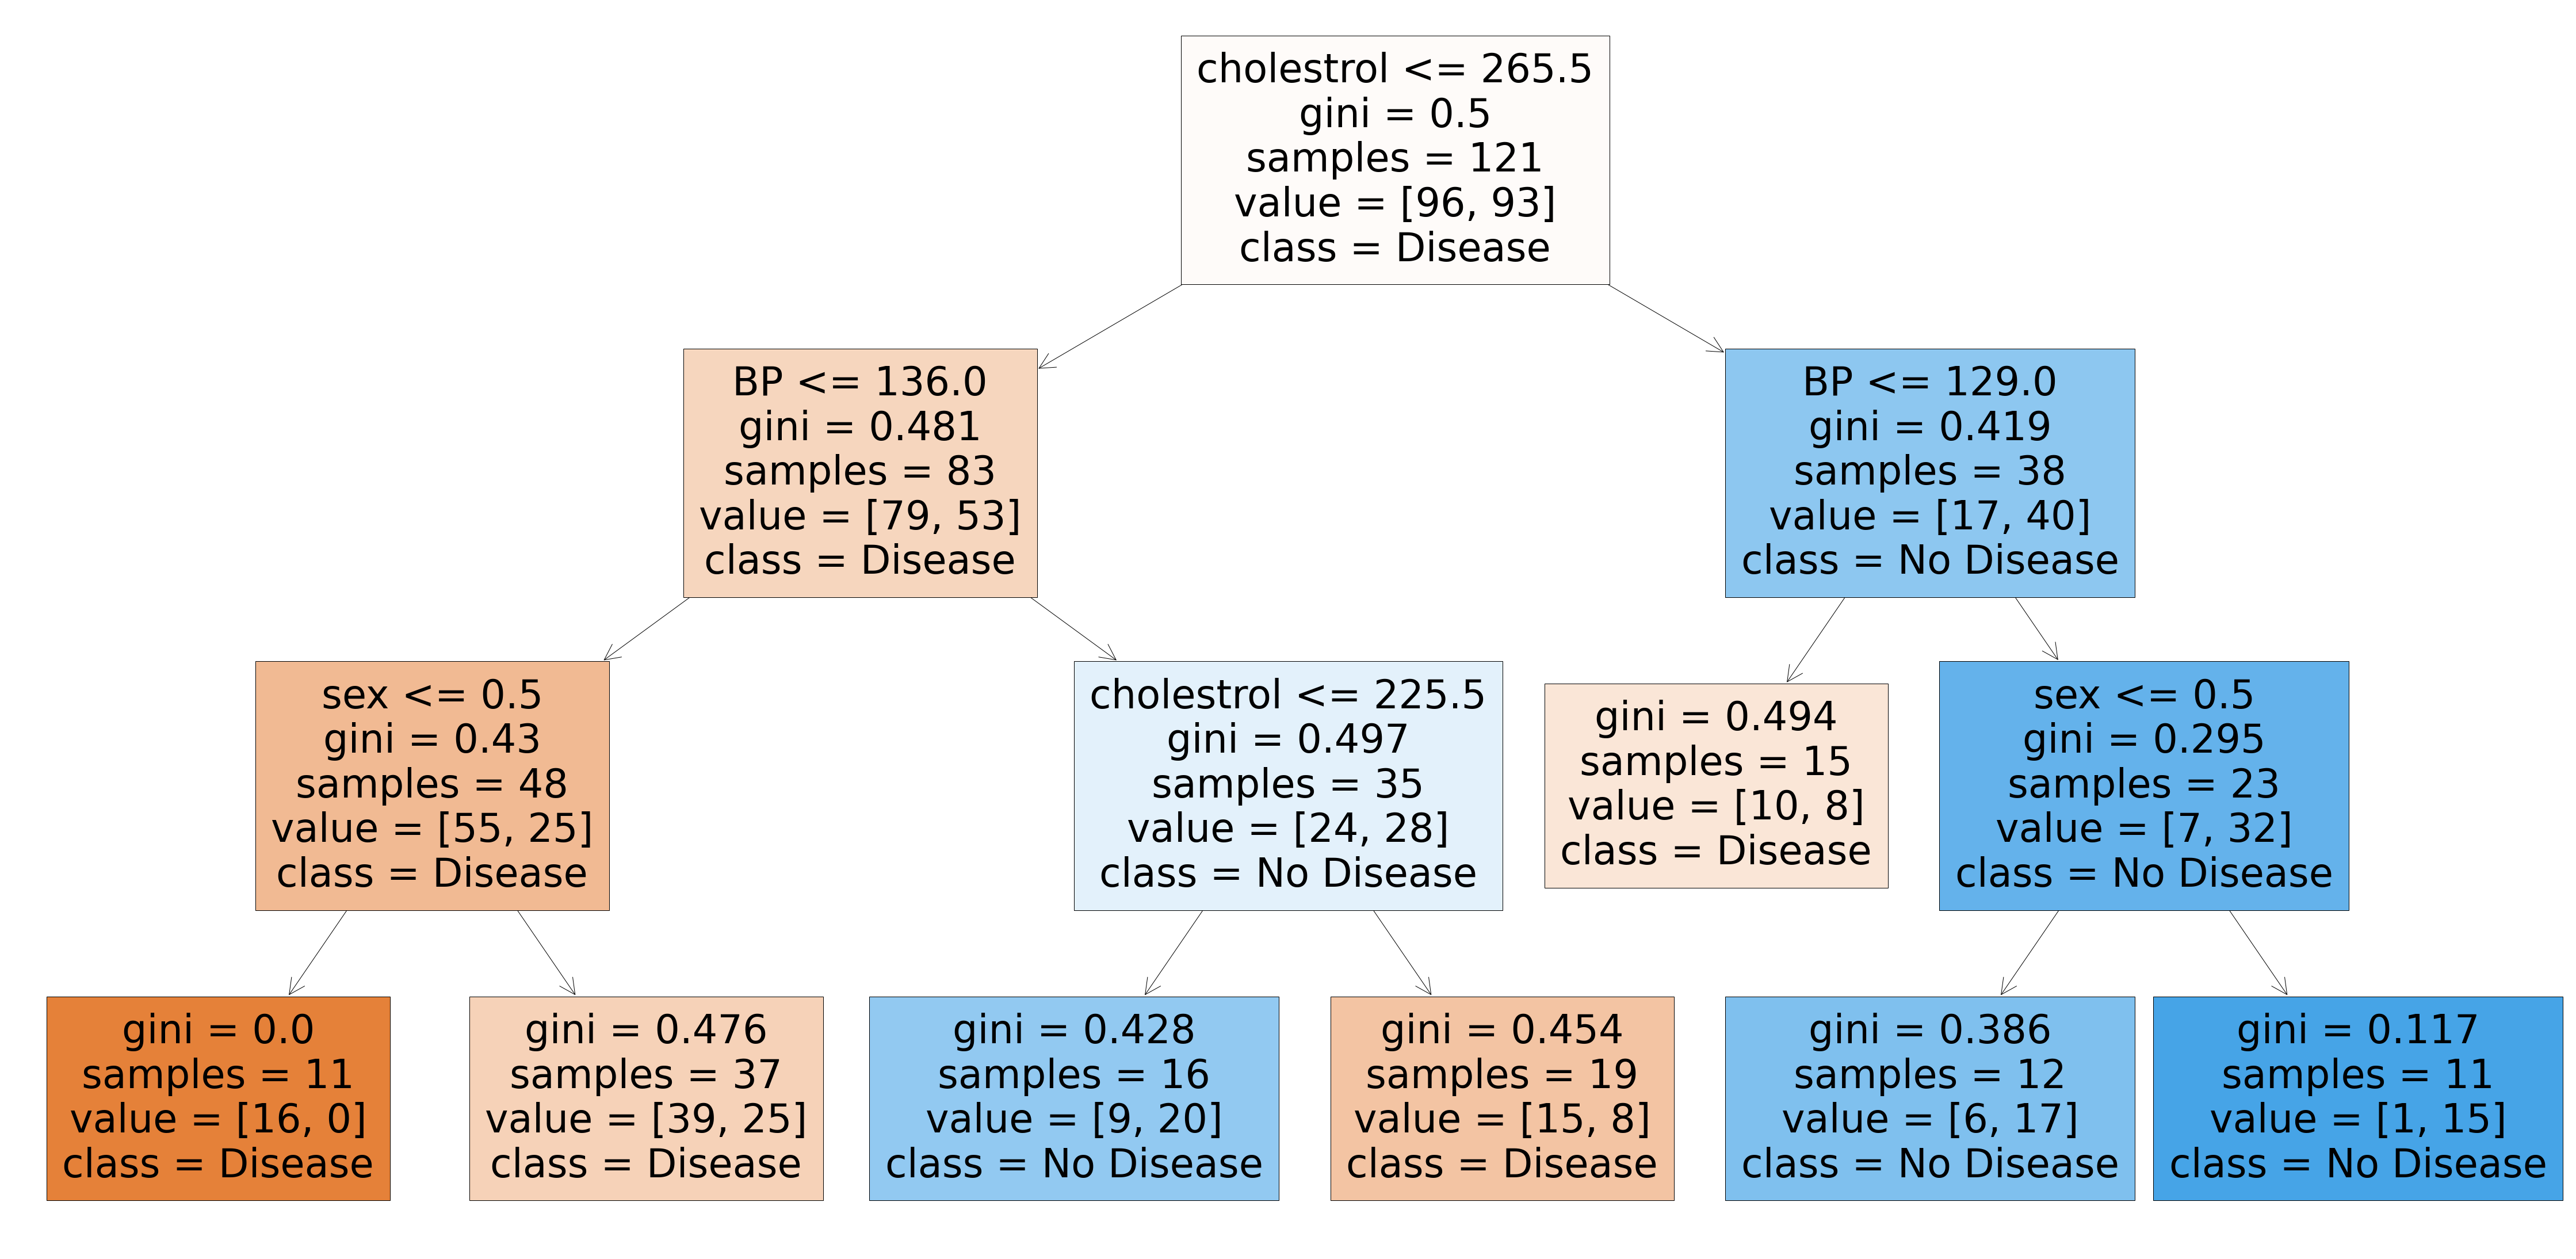

In [34]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(clf_best.estimators_[5], feature_names = X.columns,class_names=
          ['Disease', "No Disease"],filled=True);

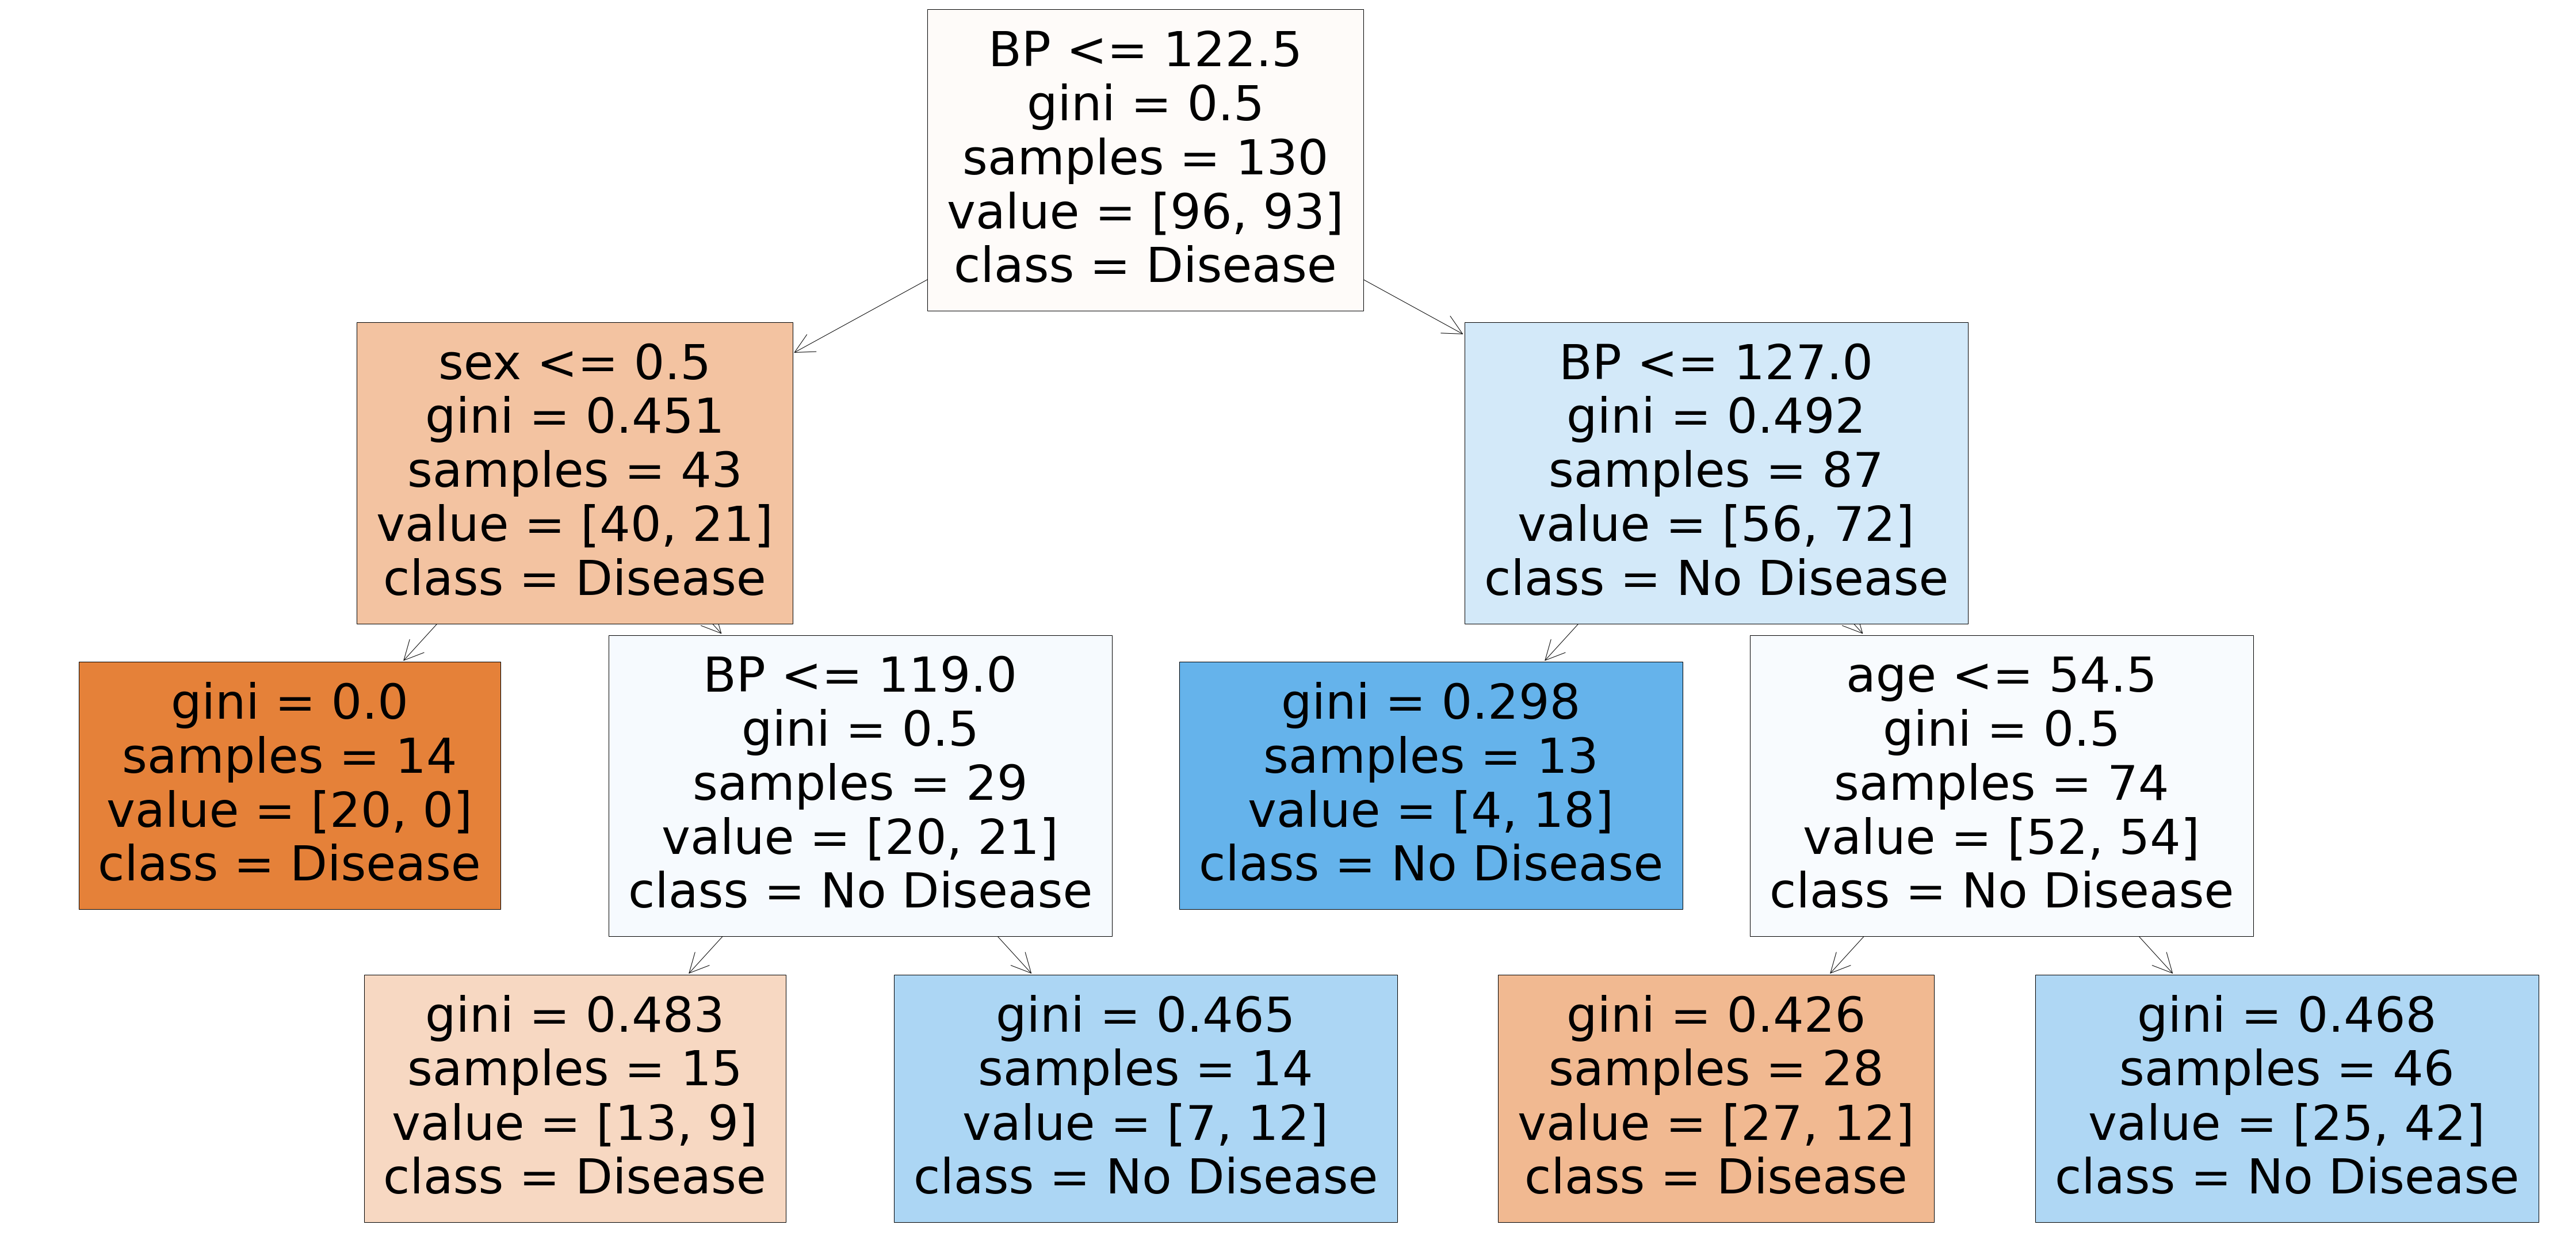

In [68]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(clf_best.estimators_[7], feature_names = X.columns,class_names=
          ['Disease', "No Disease"],filled=True);

### Feature Importance

The trees created by estimators_\[5\] and estimators_\[7\] are different. Thus we can say that each tree is independent of the other

In [35]:
 # sort the data with the help of feature importance
clf_best.feature_importances_

array([0.39602307, 0.25004729, 0.13965781, 0.21427183])

In [36]:
imp_heart = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": clf_best.feature_importances_
})

In [37]:
imp_heart.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,age,0.396023
1,sex,0.250047
3,cholestrol,0.214272
2,BP,0.139658


From the table, the most important feature for the label is **age**.

## Ensemble Learning

I will build an ensemble model with [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html), [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), and [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) from sklearn.

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

In [39]:
log_clf = LogisticRegression()
mlp_clf = MLPClassifier()
rand_clf = RandomForestClassifier()

voting_clf = VotingClassifier([('lr', log_clf), 
                               ('mlp', mlp_clf), 
                               ('rf', rand_clf)], voting = 'hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('mlp', MLPClassifier()),
                             ('rf', RandomForestClassifier())])

In [40]:
log_clf = LogisticRegression()
mlp_clf = MLPClassifier()
rand_clf = RandomForestClassifier()

voting_clf = VotingClassifier([('lr', log_clf), 
                               ('mlp', mlp_clf), 
                               ('rf', rand_clf)], voting = 'hard')

In [41]:
# the majority vote
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('mlp', MLPClassifier()),
                             ('rf', RandomForestClassifier())])

In [42]:
from sklearn.metrics import accuracy_score
for clf in [log_clf, mlp_clf, rand_clf, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'{clf.__class__.__name__}, accuracy score = {accuracy_score(y_test, y_pred)}')

LogisticRegression, accuracy score = 0.654320987654321
MLPClassifier, accuracy score = 0.5679012345679012
RandomForestClassifier, accuracy score = 0.6419753086419753
VotingClassifier, accuracy score = 0.6049382716049383


From the output, the Logistic Regression and RandomForest Classifier have better performance  than the ensemble model. The Logistic Regression has the highest accuracy score, and the accuracy score for MLPClassifier is the lowest. 

## Bagging

I will also import [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and fit the data. We will draw 100 samples from X to train each base estimator (with replacement by default), and there are 500 base estimators in the ensemble.

In [43]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators=500, 
                            max_samples=100, 
                            bootstrap = True, 
                            n_jobs = -1)

In [44]:
# Build a Bagging ensemble of estimators from the training set.
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [45]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6666666666666666

The accuracy score is 0.6667, which is the highest among all the models. 

## Reference
“Ensemble Methods: Bagging vs Boosting Difference.” Dataaspirant, 15 Dec. 2020, https://dataaspirant.com/ensemble-methods-bagging-vs-boosting-difference/.

Random Forest | Introduction To Random Forest Algorithm. (2021, June 17). Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/.

Brownlee, J. (2021, April 18). A Gentle Introduction To Ensemble Learning Algorithms - Machine Learning Mastery. Machine Learning Mastery. https://machinelearningmastery.com/tour-of-ensemble-learning-algorithms/.